In [72]:

... import pandas as pd
... import seaborn as sns 
... import matplotlib.pyplot as plt
... from sklearn import preprocessing
... from sklearn.model_selection import train_test_split
... from sklearn.linear_model import LinearRegression
... from sklearn import metrics
import numpy as np

In [73]:
df=sns.load_dataset('tips')
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [74]:
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
14,14.83,3.02,Female,No,Sun,Dinner,2
73,25.28,5.00,Female,Yes,Sat,Dinner,2
189,23.10,4.00,Male,Yes,Sun,Dinner,3
107,25.21,4.29,Male,Yes,Sat,Dinner,2
42,13.94,3.06,Male,No,Sun,Dinner,2


In [75]:
df.groupby('day').count()

/tmp/ipykernel_3277/1311733119.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day').count()


,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


In [76]:

df2 = df.groupby('day').sum(numeric_only=True)
df2.drop('size',inplace=True,axis=1)
df2['percwnt']=df2['tip']/df2['total_bill']*100
df2

/tmp/ipykernel_3277/171628600.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = df.groupby('day').sum(numeric_only=True)


,total_bill,tip,percwnt
day,,,
Thur,1096.33,171.83,15.673201
Fri,325.88,51.96,15.944519
Sat,1778.40,260.40,14.642375
Sun,1627.16,247.39,15.203791


In [77]:



df3=df.groupby('smoker').sum(numeric_only=True )
df3['percent']=df3['tip']/df3['total_bill']*100
df3

/tmp/ipykernel_3277/3684209283.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3=df.groupby('smoker').sum(numeric_only=True )


,total_bill,tip,size,percent
smoker,,,,
Yes,1930.34,279.81,224,14.495374
No,2897.43,451.77,403,15.592094


In [78]:


df4=df.groupby(['day','size']).sum(numeric_only=True)
df4['percent']=df4['tip']/df4['total_bill']*100
df4

/tmp/ipykernel_3277/3403206316.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df4=df.groupby(['day','size']).sum(numeric_only=True)


total_bill     tip    percent
day  size                               
Thur 1          10.07    1.83  18.172790
     2         727.53  117.24  16.114799
     3          76.64   10.77  14.052714
     4         149.75   21.09  14.083472
     5          41.19    5.00  12.138869
     6          91.15   15.90  17.443774
Fri  1           8.58    1.92  22.377622
     2         261.15   42.31  16.201417
     3          15.98    3.00  18.773467
     4          40.17    4.73  11.774956
     5           0.00    0.00        NaN
     6           0.00    0.00        NaN
Sat  1          10.32    2.00  19.379845
     2         892.37  133.43  14.952318
     3         459.17   68.36  14.887732
     4         388.39   53.61  13.803136
     5          28.15    3.00  10.657194
     6           0.00    0.00        NaN
Sun  1           0.00    0.00        NaN
     2         684.84  109.86  16.041703
     3         332.76   46.81  14.067196
     4         480.39   73.58  15.316722
     5          81.00   12.14  14.987654
     6          48.17    5.00  10.379905

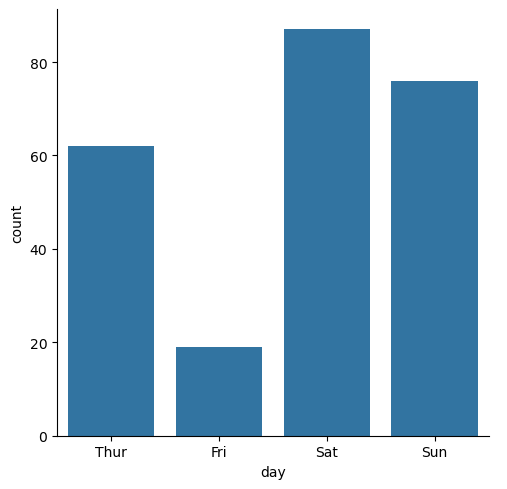

In [79]:
sns.catplot(x='day',kind='count',data=df)


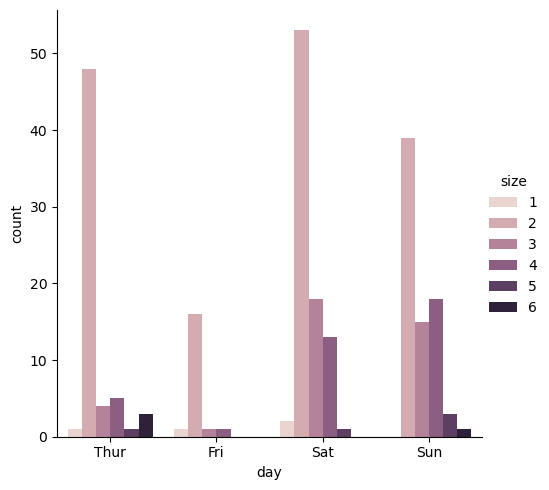

In [80]:



sns.catplot(x='day',hue='size', kind='count',data=df)

In [81]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [82]:
df.replace({'sex':{'Male':0, 'Female':1},'smoker':{'No':0, 'Yes':1}},inplace=True)

/tmp/ipykernel_3277/830166235.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'Male':0, 'Female':1},'smoker':{'No':0, 'Yes':1}},inplace=True)
/tmp/ipykernel_3277/830166235.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.replace({'sex':{'Male':0, 'Female':1},'smoker':{'No':0, 'Yes':1}},inplace=True)
/tmp/ipykernel_3277/830166235.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To 

In [83]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,Sun,Dinner,2
1,10.34,1.66,0,0,Sun,Dinner,3
2,21.01,3.50,0,0,Sun,Dinner,3
3,23.68,3.31,0,0,Sun,Dinner,2
4,24.59,3.61,1,0,Sun,Dinner,4


In [84]:
days =pd.get_dummies(df['day'],dtype=int )
days.sample(5)

,Thur,Fri,Sat,Sun
13,0,0,0,1
86,1,0,0,0
63,0,0,1,0
22,0,0,1,0
186,0,0,0,1


In [85]:
days=pd.get_dummies(df['day'],dtype=int)
df=pd.concat([df,days],axis=1)


In [86]:
times=pd.get_dummies(df['time'],dtype=int)
df=pd.concat([df,times],axis=1)

In [87]:
df

,total_bill,tip,sex,smoker,day,time,size,Thur,Fri,Sat,Sun,Lunch,Dinner
0,16.99,1.01,1,0,Sun,Dinner,2,0,0,0,1,0,1
1,10.34,1.66,0,0,Sun,Dinner,3,0,0,0,1,0,1
2,21.01,3.50,0,0,Sun,Dinner,3,0,0,0,1,0,1
3,23.68,3.31,0,0,Sun,Dinner,2,0,0,0,1,0,1
4,24.59,3.61,1,0,Sun,Dinner,4,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,Sat,Dinner,3,0,0,1,0,0,1
240,27.18,2.00,1,1,Sat,Dinner,2,0,0,1,0,0,1
241,22.67,2.00,0,1,Sat,Dinner,2,0,0,1,0,0,1
242,17.82,1.75,0,0,Sat,Dinner,2,0,0,1,0,0,1


In [88]:
X=df[['sex','smoker','size','Fri','Sat','Sun','Dinner']]
Y=df[['tip']]

In [89]:
X

,sex,smoker,size,Fri,Sat,Sun,Dinner
0,1,0,2,0,0,1,1
1,0,0,3,0,0,1,1
2,0,0,3,0,0,1,1
3,0,0,2,0,0,1,1
4,1,0,4,0,0,1,1
...,...,...,...,...,...,...,...
239,0,0,3,0,1,0,1
240,1,1,2,0,1,0,1
241,0,1,2,0,1,0,1
242,0,0,2,0,1,0,1


In [90]:
Y


,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


In [91]:
X_train, X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.25, random_state=26)

In [92]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [93]:
predictions=regressor.predict(X_test)

<Axes: ylabel='Count'>

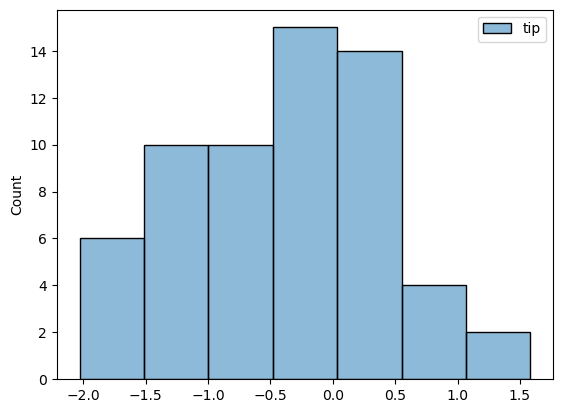

In [94]:
sns.histplot(Y_test-predictions)

In [95]:
X_test

,sex,smoker,size,Fri,Sat,Sun,Dinner
135,1,0,2,0,0,0,0
111,1,0,1,0,1,0,1
124,1,0,2,0,0,0,0
227,0,0,4,0,1,0,1
125,1,0,6,0,0,0,0
...,...,...,...,...,...,...,...
100,1,1,2,1,0,0,1
205,1,1,3,0,0,0,0
92,1,1,2,1,0,0,1
94,1,0,2,1,0,0,1


In [96]:
Y_test


,tip
135,1.25
111,1.00
124,2.52
227,3.00
125,4.20
...,...
100,2.50
205,3.23
92,1.00
94,3.25


In [97]:
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,predictions))
print('Mean Squared Error:',metrics.mean_squared_error(Y_test,predictions))
print('Root Mean Squared Error:',np.sqrt(metrics.root_mean_squared_error(Y_test,predictions) ))


Mean Absolute Error: 0.69186018000511
Mean Squared Error: 0.7790431554801632
Root Mean Squared Error: 0.9394861435179398


In [104]:
X.head()

,sex,smoker,size,Fri,Sat,Sun,Dinner
0,1,0,2,0,0,1,1
1,0,0,3,0,0,1,1
2,0,0,3,0,0,1,1
3,0,0,2,0,0,1,1
4,1,0,4,0,0,1,1


In [108]:
new_customer

array([[0, 1, 3, 1, 0, 0, 0]])

In [107]:
new_customer=np.array([0,1,3,1,0,0,0]).reshape(1,-1)
regressor.predict(new_customer)

/usr/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3.12444493]])